In [19]:
import rasterstats
import pandas as pd
from rasterio.plot import show

# Import libs
import sys
module_path = os.path.abspath(os.path.join('..', 'libs'))
if module_path not in sys.path:
    sys.path.append(module_path)
from s3utils import *

## Bring in slope raster

In [2]:
S3 = S3Helper('roof-index')
slope_path = "missoula/geospatial/downtown_slope.tif" 
slope = S3.read_tif_from_s3_as_rio(slope_path) 
slope.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 1571,
 'height': 1645,
 'count': 1,
 'crs': CRS.from_epsg(6514),
 'transform': Affine(0.9144000000087544, 0.0, 257075.3304003399,
        0.0, -0.9144000000087544, 301627.6416007468)}

## Plot slope

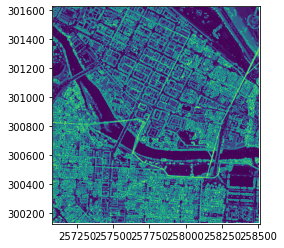

<AxesSubplot:>

In [20]:
show(slope)

## Bring in vector data

In [21]:
bldgs_path = "missoula/geospatial/contiguous_flat.zip"
bldgs = S3.read_shp_from_s3_as_gpd(bldgs_path).to_crs(6514)

In [22]:
slope_arr = slope.read(1)
affine = slope.transform

In [28]:
zstats = rasterstats.zonal_stats(bldgs, slope_arr, affine=affine,
                                 nodata=slope.nodata, geojson_out=True,
                                 stats=['median', 'mean'])

In [30]:
ua = []
for bldg_stats in zstats:
    bldg_ua = (bldg_stats['properties']['fid'], bldg_stats['properties']['median'])
    ua.append(bldg_ua)

ua_df = gpd.GeoDataFrame(ua, columns=['fid', 'slope_perc'])
full_data = pd.merge(bldgs, ua_df)

In [34]:
full_data.slope_perc.mean()

5.454825355191207

In [32]:
slope_arr[slope_arr != -9999].min()

0.0

Text(0.5, 0, 'Slope')

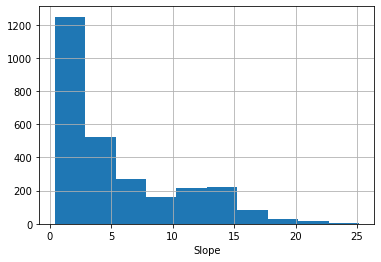

In [38]:
ax = full_data.slope_perc.hist()
ax.set_xlabel("Slope")

In [39]:
full_data.shape

(2766, 11)

In [ ]:
full_data.columns